# Регрессия на доходность первого дня

### Импорты

In [1]:
import numpy as np
import pandas as pd

from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

import shap

from scipy.stats import spearmanr, pearsonr, kendalltau

import warnings
warnings.filterwarnings("ignore")

### Датафрейм

In [41]:
path = '../../../data/final/pairs.csv'

data = pd.read_csv(path, index_col = 0)
data.head(3)

views  forwards  thumb_up_react_cnt  thumb_down_react_cnt  \
0  63078        63                 251                    19   
1  63078        63                 251                    19   
2  63078        63                 251                    19   

   mindblowing_react_cnt  heart_react_cnt  thinking_react_cnt  \
0                      0               27                  36   
1                      0               27                  36   
2                      0               27                  36   

   crying_react_cnt  fire_react_cnt  clap_react_cnt  ...  \
0                 0               2               0  ...   
1                 0               2               0  ...   
2                 0               2               0  ...   

   free_bird_react_cnt_x_positive_div_by_days  \
0                                        -0.0   
1                                        -0.0   
2                                        -0.0   

   snowman_react_cnt_x_positive_div_by_days  \
0                                      -0.0   
1                                      -0.0   
2                                      -0.0   

   banana_react_cnt_x_positive_div_by_days  \
0                                     -0.0   
1                                     -0.0   
2                                     -0.0   

   poop_react_cnt_x_positive_div_by_days  \
0                                   -0.0   
1                                   -0.0   
2                                   -0.0   

   rofl_smile_react_cnt_x_positive_div_by_days  \
0                                         -0.0   
1                                         -0.0   
2                                         -0.0   

   clown_smile_react_cnt_x_positive_div_by_days  \
0                                          -0.0   
1                                          -0.0   
2                                          -0.0   

   devil_smile_react_cnt_x_positive_div_by_days  \
0                                          -0.0   
1                                          -0.0   
2                                          -0.0   

   hundred_react_cnt_x_positive_div_by_days  \
0                                      -0.0   
1                                      -0.0   
2                                      -0.0   

   head_arm_smile_react_cnt_x_positive_div_by_days  \
0                                             -0.0   
1                                             -0.0   
2                                             -0.0   

   eyes_react_cnt_x_positive_div_by_days  
0                                   -0.0  
1                                   -0.0  
2                                   -0.0  

[3 rows x 147 columns]

In [64]:
pd.DataFrame({'Название' : list(data.columns),
              'Интерпретация' : ['']*len(list(data.columns)),
              'Пример значений' : list(map(lambda x: x[0], data.head(2).tail(1).T.values))
             }).to_csv('examples.csv')

[63078.0,
 63.0,
 251.0,
 19.0,
 0.0,
 27.0,
 36.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4,
 0.51,
 0.57,
 nan,
 18.0,
 1938.0,
 27.39,
 2.280000000000001,
 0.0908,
 25.57,
 -0.3900000000000005,
 0.0908,
 -1.039290428161621,
 -63078.0,
 -63.0,
 -251.0,
 -19.0,
 -0.0,
 -27.0,
 -36.0,
 -0.0,
 -2.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -5.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -6.0,
 -1.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 3504.333333333333,
 3.5,
 13.944444444444445,
 1.0555555555555556,
 0.0,
 1.5,
 2.0,
 0.0,
 0.1111111111111111,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2777777777777778,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.0555555555555555,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 107.66666666666669,
 -0.05773835712009,
 -3504.333333333333,
 -3.5,
 -13.944444444444445,
 -1.055555555555555

array([[ 6.30780000e+04],
       [ 6.30000000e+01],
       [ 2.51000000e+02],
       [ 1.90000000e+01],
       [ 0.00000000e+00],
       [ 2.70000000e+01],
       [ 3.60000000e+01],
       [ 0.00000000e+00],
       [ 2.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 5.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 6.00000000e+00],
       [ 1.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 4.00000000e-01],
       [ 5.10000000e-01],
       [ 5.70000000e-01],
       [            nan],
       [ 1.80000000e+01],
       [ 1.9

In [3]:
cols = ['views',
 'forwards',
 'thumb_up_react_cnt',
 'thumb_down_react_cnt',
 'mindblowing_react_cnt',
 'heart_react_cnt',
 'thinking_react_cnt',
 'crying_react_cnt',
 'fire_react_cnt',
 'clap_react_cnt',
 'whale_react_cnt',
 'champaign_react_cnt',
 'heart_fire_react_cnt',
 'okay_react_cnt',
 'smile_stars_react_cnt',
 'smiling_react_cnt',
 'cheers_react_cnt',
 'lovely_smile_react_cnt',
 'drunk_smile_react_cnt',
 'angry_smile_react_cnt',
 'shicked_smile_react_cnt',
 'moos_smile_react_cnt',
 'hotdog_react_cnt',
 'free_bird_react_cnt',
 'snowman_react_cnt',
 'banana_react_cnt',
 'poop_react_cnt',
 'rofl_smile_react_cnt',
 'clown_smile_react_cnt',
 'devil_smile_react_cnt',
 'hundred_react_cnt',
 'head_arm_smile_react_cnt',
 'eyes_react_cnt',
 'days_before_ipo',
 'text_len',
 'price',
 'delta_price',
 'delta_perc',
 'open',
 'delta_open',
 'delta_perc_on_ipo_date',
 'positive_score',
 'views_x_positive',
 'forwards_x_positive',
 'thumb_up_react_cnt_x_positive',
 'thumb_down_react_cnt_x_positive',
 'mindblowing_react_cnt_x_positive',
 'heart_react_cnt_x_positive',
 'thinking_react_cnt_x_positive',
 'crying_react_cnt_x_positive',
 'fire_react_cnt_x_positive',
 'clap_react_cnt_x_positive',
 'whale_react_cnt_x_positive',
 'champaign_react_cnt_x_positive',
 'heart_fire_react_cnt_x_positive',
 'okay_react_cnt_x_positive',
 'smile_stars_react_cnt_x_positive',
 'smiling_react_cnt_x_positive',
 'cheers_react_cnt_x_positive',
 'lovely_smile_react_cnt_x_positive',
 'drunk_smile_react_cnt_x_positive',
 'angry_smile_react_cnt_x_positive',
 'shicked_smile_react_cnt_x_positive',
 'moos_smile_react_cnt_x_positive',
 'hotdog_react_cnt_x_positive',
 'free_bird_react_cnt_x_positive',
 'snowman_react_cnt_x_positive',
 'banana_react_cnt_x_positive',
 'poop_react_cnt_x_positive',
 'rofl_smile_react_cnt_x_positive',
 'clown_smile_react_cnt_x_positive',
 'devil_smile_react_cnt_x_positive',
 'hundred_react_cnt_x_positive',
 'head_arm_smile_react_cnt_x_positive',
 'eyes_react_cnt_x_positive',
 'views_div_by_days',
 'forwards_div_by_days',
 'thumb_up_react_cnt_div_by_days',
 'thumb_down_react_cnt_div_by_days',
 'mindblowing_react_cnt_div_by_days',
 'heart_react_cnt_div_by_days',
 'thinking_react_cnt_div_by_days',
 'crying_react_cnt_div_by_days',
 'fire_react_cnt_div_by_days',
 'clap_react_cnt_div_by_days',
 'whale_react_cnt_div_by_days',
 'champaign_react_cnt_div_by_days',
 'heart_fire_react_cnt_div_by_days',
 'okay_react_cnt_div_by_days',
 'smile_stars_react_cnt_div_by_days',
 'smiling_react_cnt_div_by_days',
 'cheers_react_cnt_div_by_days',
 'lovely_smile_react_cnt_div_by_days',
 'drunk_smile_react_cnt_div_by_days',
 'angry_smile_react_cnt_div_by_days',
 'shicked_smile_react_cnt_div_by_days',
 'moos_smile_react_cnt_div_by_days',
 'hotdog_react_cnt_div_by_days',
 'free_bird_react_cnt_div_by_days',
 'snowman_react_cnt_div_by_days',
 'banana_react_cnt_div_by_days',
 'poop_react_cnt_div_by_days',
 'rofl_smile_react_cnt_div_by_days',
 'clown_smile_react_cnt_div_by_days',
 'devil_smile_react_cnt_div_by_days',
 'hundred_react_cnt_div_by_days',
 'head_arm_smile_react_cnt_div_by_days',
 'eyes_react_cnt_div_by_days',
 'text_len_div_by_days',
 'positive_score_div_by_days',
 'views_x_positive_div_by_days',
 'forwards_x_positive_div_by_days',
 'thumb_up_react_cnt_x_positive_div_by_days',
 'thumb_down_react_cnt_x_positive_div_by_days',
 'mindblowing_react_cnt_x_positive_div_by_days',
 'heart_react_cnt_x_positive_div_by_days',
 'thinking_react_cnt_x_positive_div_by_days',
 'crying_react_cnt_x_positive_div_by_days',
 'fire_react_cnt_x_positive_div_by_days',
 'clap_react_cnt_x_positive_div_by_days',
 'whale_react_cnt_x_positive_div_by_days',
 'champaign_react_cnt_x_positive_div_by_days',
 'heart_fire_react_cnt_x_positive_div_by_days',
 'okay_react_cnt_x_positive_div_by_days',
 'smile_stars_react_cnt_x_positive_div_by_days',
 'smiling_react_cnt_x_positive_div_by_days',
 'cheers_react_cnt_x_positive_div_by_days',
 'lovely_smile_react_cnt_x_positive_div_by_days',
 'drunk_smile_react_cnt_x_positive_div_by_days',
 'angry_smile_react_cnt_x_positive_div_by_days',
 'shicked_smile_react_cnt_x_positive_div_by_days',
 'moos_smile_react_cnt_x_positive_div_by_days',
 'hotdog_react_cnt_x_positive_div_by_days',
 'free_bird_react_cnt_x_positive_div_by_days',
 'snowman_react_cnt_x_positive_div_by_days',
 'banana_react_cnt_x_positive_div_by_days',
 'poop_react_cnt_x_positive_div_by_days',
 'rofl_smile_react_cnt_x_positive_div_by_days',
 'clown_smile_react_cnt_x_positive_div_by_days',
 'devil_smile_react_cnt_x_positive_div_by_days',
 'hundred_react_cnt_x_positive_div_by_days',
 'head_arm_smile_react_cnt_x_positive_div_by_days',
 'eyes_react_cnt_x_positive_div_by_days']

target = '1d_price'

In [4]:
data = data[data[target].notnull()]

X = data[cols]
X['crying_react_cnt'] = X['crying_react_cnt'].clip(0, 1000)
y = (data[target] > 0).astype(int)

### Results collection

In [5]:
results = pd.DataFrame(columns = ['Accuracy', 'roc_auc_score', 'f1_score'])

### Baseline model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [7]:
model = LGBMClassifier()

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_pred_score_train = model.predict_proba(X_train)[:, 1]
y_pred_score_test = model.predict_proba(X_test)[:, 1]

In [8]:
# accuracy
acc_train = round(accuracy_score(y_train, y_pred_train), 4)
acc_test = round(accuracy_score(y_test, y_pred_test), 4)

# f1
f1_train = round(f1_score(y_train, y_pred_train), 4)
f1_test = round(f1_score(y_test, y_pred_test), 4)

# roc_auc
auc_train = round(roc_auc_score(y_train, y_pred_score_train), 4)
auc_test = round(roc_auc_score(y_test, y_pred_score_test), 4)

cur_res = {'Accuracy' : acc_train,
          'roc_auc_score' : auc_train,
          'f1_score' : f1_train}

results = results.append(pd.Series(cur_res,  name = 'baseline_train'))

cur_res = {'Accuracy' : acc_test,
          'roc_auc_score' : auc_test,
          'f1_score' : f1_test}

results = results.append(pd.Series(cur_res,  name = 'baseline_test'))
results

Accuracy  roc_auc_score  f1_score
baseline_train    0.9216         0.9667    0.7608
baseline_test     0.8962         0.9424    0.6669

### Feature selection

1. Null drop
2. Nonsense drop
3. Correlation drop
4. roc auc drop
5. Forward selection drop

In [9]:
import sys
sys.path.insert(1, '../../pipeline')

import pipeline as pl

In [10]:
cols = X_train.columns
print(f'{len(cols)} features before pipeline')

143 features before pipeline


### Null drop

In [11]:
cols = pl.null_drop(X, cutoff = 0.5)
print(f'{len(cols)} features remain')

143 features remain


### Nonsense drop

In [12]:
cols = pl.nonsense_drop(X[cols], 0.9)
print(f'{len(cols)} features remain')

47 features remain


In [13]:
model = LGBMClassifier()

model.fit(X_train[cols], y_train)

y_pred_train = model.predict(X_train[cols])
y_pred_test = model.predict(X_test[cols])

y_pred_score_train = model.predict_proba(X_train[cols])[:, 1]
y_pred_score_test = model.predict_proba(X_test[cols])[:, 1]

In [14]:
# accuracy
acc_train = round(accuracy_score(y_train, y_pred_train), 4)
acc_test = round(accuracy_score(y_test, y_pred_test), 4)

# f1
f1_train = round(f1_score(y_train, y_pred_train), 4)
f1_test = round(f1_score(y_test, y_pred_test), 4)

# roc_auc
auc_train = round(roc_auc_score(y_train, y_pred_score_train), 4)
auc_test = round(roc_auc_score(y_test, y_pred_score_test), 4)

cur_res = {'Accuracy' : acc_train,
          'roc_auc_score' : auc_train,
          'f1_score' : f1_train}

results = results.append(pd.Series(cur_res,  name = 'after_nonsense_drop_train'))

cur_res = {'Accuracy' : acc_test,
          'roc_auc_score' : auc_test,
          'f1_score' : f1_test}

results = results.append(pd.Series(cur_res,  name = 'after_nonsense_drop_test'))
results

Accuracy  roc_auc_score  f1_score
baseline_train               0.9216         0.9667    0.7608
baseline_test                0.8962         0.9424    0.6669
after_nonsense_drop_train    0.9226         0.9671    0.7659
after_nonsense_drop_test     0.8991         0.9416    0.6778

### Correlation drop

In [15]:
cols = pl.corr_drop_classification(X[cols], y,  0.8)
print(f'{len(cols)} features remain')

open (0.56) was removed by price (0.56)
delta_perc (0.511) was removed by delta_price (0.511)
delta_perc (0.511) was removed by delta_perc_on_ipo_date (0.511)
crying_react_cnt_div_by_days (0.5) was removed by crying_react_cnt_x_positive_div_by_days (0.5)
smiling_react_cnt_x_positive_div_by_days (0.501) was removed by smiling_react_cnt_div_by_days (0.502)
42 features remain


In [16]:
model = LGBMClassifier()

model.fit(X_train[cols], y_train)

y_pred_train = model.predict(X_train[cols])
y_pred_test = model.predict(X_test[cols])

y_pred_score_train = model.predict_proba(X_train[cols])[:, 1]
y_pred_score_test = model.predict_proba(X_test[cols])[:, 1]

In [17]:
# accuracy
acc_train = round(accuracy_score(y_train, y_pred_train), 4)
acc_test = round(accuracy_score(y_test, y_pred_test), 4)

# f1
f1_train = round(f1_score(y_train, y_pred_train), 4)
f1_test = round(f1_score(y_test, y_pred_test), 4)

# roc_auc
auc_train = round(roc_auc_score(y_train, y_pred_score_train), 4)
auc_test = round(roc_auc_score(y_test, y_pred_score_test), 4)

cur_res = {'Accuracy' : acc_train,
          'roc_auc_score' : auc_train,
          'f1_score' : f1_train}

results = results.append(pd.Series(cur_res,  name = 'after_soft_correlation_drop_train'))

cur_res = {'Accuracy' : acc_test,
          'roc_auc_score' : auc_test,
          'f1_score' : f1_test}

results = results.append(pd.Series(cur_res,  name = 'after_soft_correlation_drop_test'))
results

Accuracy  roc_auc_score  f1_score
baseline_train                       0.9216         0.9667    0.7608
baseline_test                        0.8962         0.9424    0.6669
after_nonsense_drop_train            0.9226         0.9671    0.7659
after_nonsense_drop_test             0.8991         0.9416    0.6778
after_soft_correlation_drop_train    0.9214         0.9640    0.7608
after_soft_correlation_drop_test     0.8972         0.9375    0.6725

### roc_auc drop

In [18]:
cols_temp = []
cutoff = 0.525

for col in cols:
    auc = roc_auc_score(y_train, X_train[col])
    auc = max(auc, 1-auc)
    if auc > cutoff:
        cols_temp.append(col)
        
cols = cols_temp
print(f'{len(cols)} features remain')

12 features remain


In [19]:
model = LGBMClassifier()

model.fit(X_train[cols], y_train)

y_pred_train = model.predict(X_train[cols])
y_pred_test = model.predict(X_test[cols])

y_pred_score_train = model.predict_proba(X_train[cols])[:, 1]
y_pred_score_test = model.predict_proba(X_test[cols])[:, 1]

In [20]:
# accuracy
acc_train = round(accuracy_score(y_train, y_pred_train), 4)
acc_test = round(accuracy_score(y_test, y_pred_test), 4)

# f1
f1_train = round(f1_score(y_train, y_pred_train), 4)
f1_test = round(f1_score(y_test, y_pred_test), 4)

# roc_auc
auc_train = round(roc_auc_score(y_train, y_pred_score_train), 4)
auc_test = round(roc_auc_score(y_test, y_pred_score_test), 4)

cur_res = {'Accuracy' : acc_train,
          'roc_auc_score' : auc_train,
          'f1_score' : f1_train}

results = results.append(pd.Series(cur_res,  name = 'after_auc_drop_train'))

cur_res = {'Accuracy' : acc_test,
          'roc_auc_score' : auc_test,
          'f1_score' : f1_test}

results = results.append(pd.Series(cur_res,  name = 'after_auc_drop_test'))
results

Accuracy  roc_auc_score  f1_score
baseline_train                       0.9216         0.9667    0.7608
baseline_test                        0.8962         0.9424    0.6669
after_nonsense_drop_train            0.9226         0.9671    0.7659
after_nonsense_drop_test             0.8991         0.9416    0.6778
after_soft_correlation_drop_train    0.9214         0.9640    0.7608
after_soft_correlation_drop_test     0.8972         0.9375    0.6725
after_auc_drop_train                 0.9187         0.9611    0.7527
after_auc_drop_test                  0.8983         0.9366    0.6801

### Forward selection

In [21]:
train_df = X_train
train_df['target'] = y_train
model = LGBMClassifier

In [22]:
cols = pl.forward_selection_classification(train_df, cols[:10], model, target='target', alpha_in=0.05)

В модель была добавлена переменная heart_react_cnt_div_by_days, p-value: 0.0
В модель была добавлена переменная views, p-value: 0.0
В модель была добавлена переменная forwards_div_by_days, p-value: 0.0
В модель была добавлена переменная views_div_by_days, p-value: 0.0
В модель была добавлена переменная days_before_ipo, p-value: 0.0
В модель была добавлена переменная open, p-value: 0.0
В модель была добавлена переменная thumb_up_react_cnt, p-value: 0.0


### Итоговые переменные

In [23]:
print(f'total params:{len(cols)}')
cols

total params:7


['heart_react_cnt_div_by_days',
 'views',
 'forwards_div_by_days',
 'views_div_by_days',
 'days_before_ipo',
 'open',
 'thumb_up_react_cnt']

### Model

In [24]:
model = LGBMClassifier()

model.fit(X_train[cols], y_train)

y_pred_train = model.predict(X_train[cols])
y_pred_test = model.predict(X_test[cols])

y_pred_score_train = model.predict_proba(X_train[cols])[:, 1]
y_pred_score_test = model.predict_proba(X_test[cols])[:, 1]

In [25]:
# accuracy
acc_train = round(accuracy_score(y_train, y_pred_train), 4)
acc_test = round(accuracy_score(y_test, y_pred_test), 4)

# f1
f1_train = round(f1_score(y_train, y_pred_train), 4)
f1_test = round(f1_score(y_test, y_pred_test), 4)

# roc_auc
auc_train = round(roc_auc_score(y_train, y_pred_score_train), 4)
auc_test = round(roc_auc_score(y_test, y_pred_score_test), 4)

cur_res = {'Accuracy' : acc_train,
          'roc_auc_score' : auc_train,
          'f1_score' : f1_train}

results = results.append(pd.Series(cur_res,  name = 'model_train'))

cur_res = {'Accuracy' : acc_test,
          'roc_auc_score' : auc_test,
          'f1_score' : f1_test}

results = results.append(pd.Series(cur_res,  name = 'model_test'))
results

Accuracy  roc_auc_score  f1_score
baseline_train                       0.9216         0.9667    0.7608
baseline_test                        0.8962         0.9424    0.6669
after_nonsense_drop_train            0.9226         0.9671    0.7659
after_nonsense_drop_test             0.8991         0.9416    0.6778
after_soft_correlation_drop_train    0.9214         0.9640    0.7608
after_soft_correlation_drop_test     0.8972         0.9375    0.6725
after_auc_drop_train                 0.9187         0.9611    0.7527
after_auc_drop_test                  0.8983         0.9366    0.6801
model_train                          0.9161         0.9608    0.7445
model_test                           0.8968         0.9405    0.6752

In [26]:
results.to_csv('results/1d_boosting.csv')

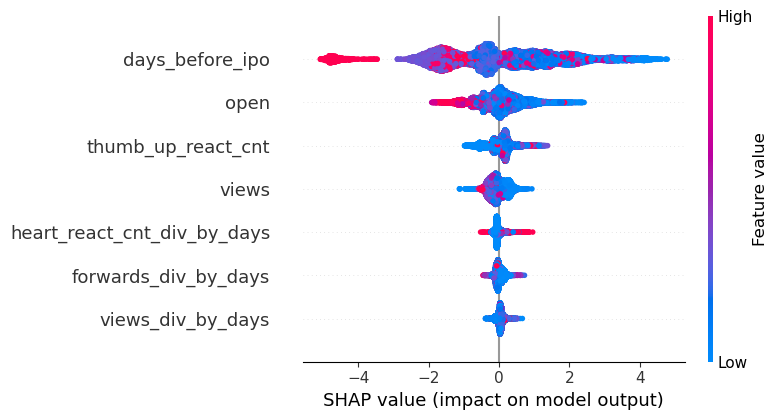

In [27]:
shap_test = shap.TreeExplainer(model).shap_values(X_train[cols])
shap.summary_plot(shap_test, X_train[cols],
                      max_display=25, auto_size_plot=True)

### Обзор вошедших переменных

In [28]:
cols

['heart_react_cnt_div_by_days',
 'views',
 'forwards_div_by_days',
 'views_div_by_days',
 'days_before_ipo',
 'open',
 'thumb_up_react_cnt']

#### days_before_ipo

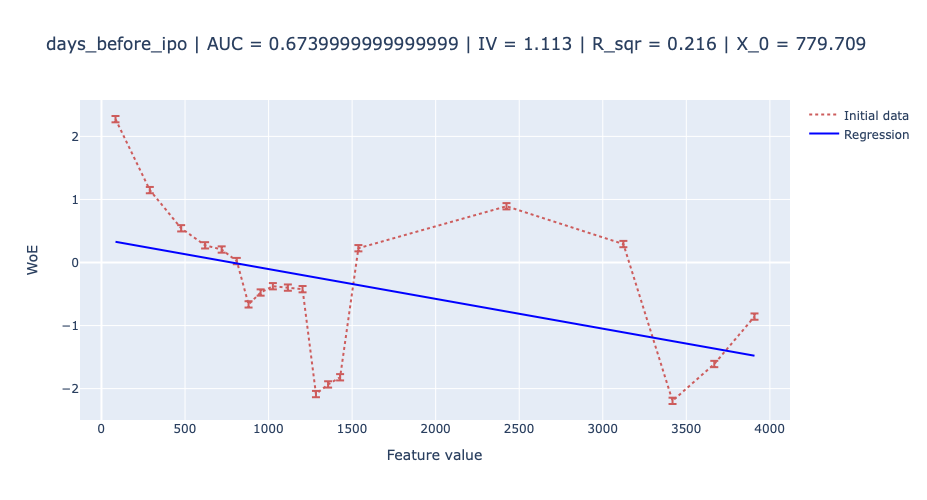

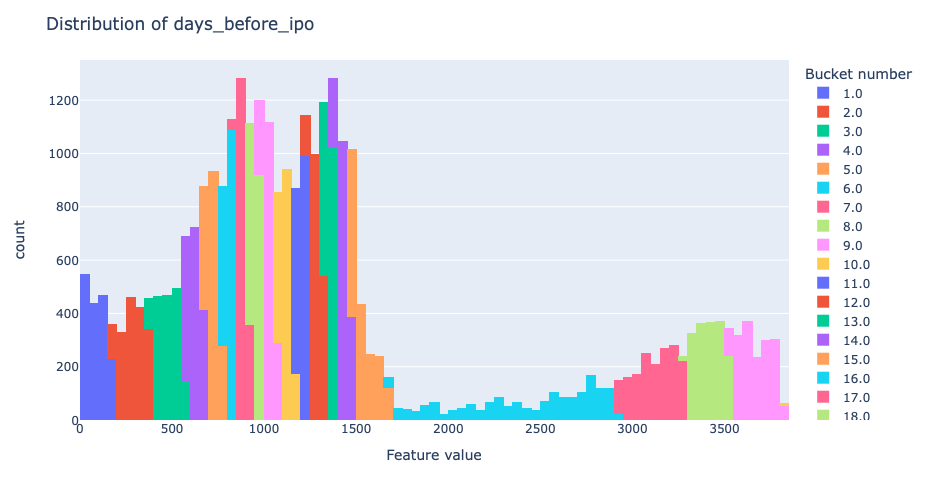

In [36]:
pl.woe_line(X_train['days_before_ipo'], y_train, n_buckets=20, feature_name='days_before_ipo', target_name=target, interactive = False)

#### open

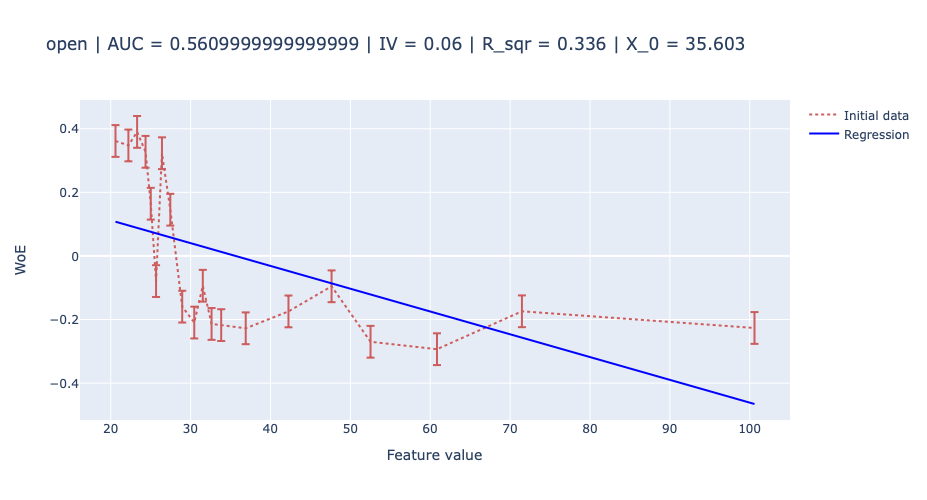

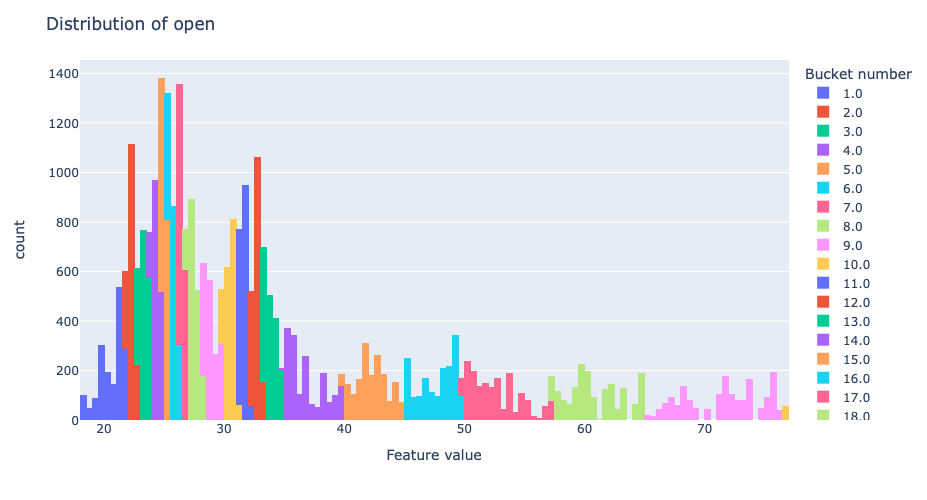

In [37]:
pl.woe_line(X_train['open'], y_train, n_buckets=20, feature_name='open', target_name=target, interactive = False)

#### thumb_up_react_cnt

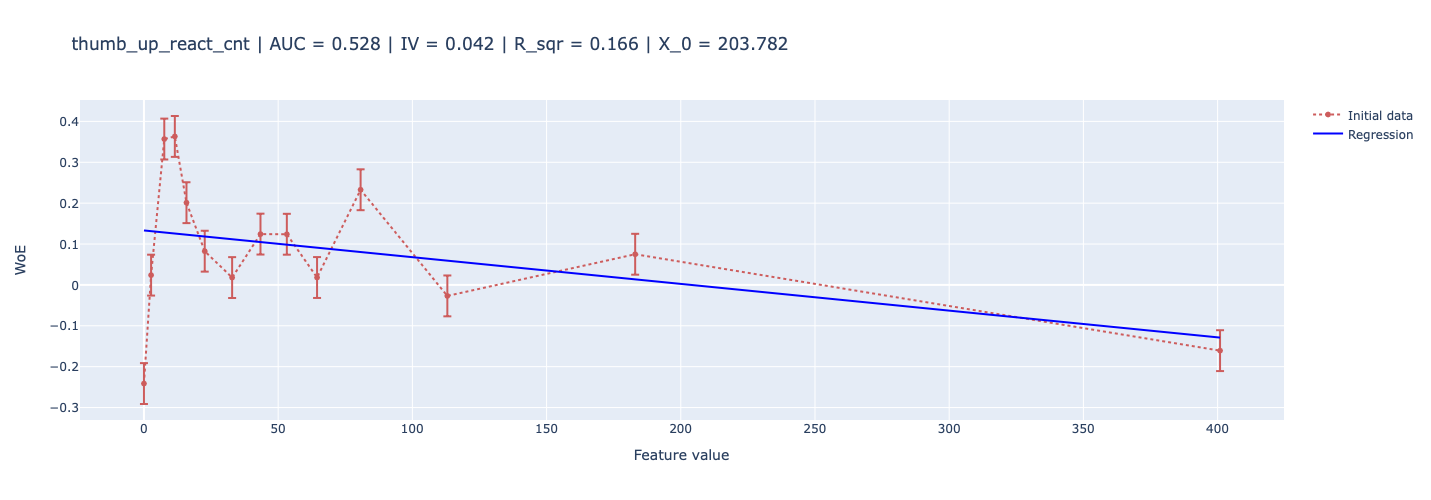

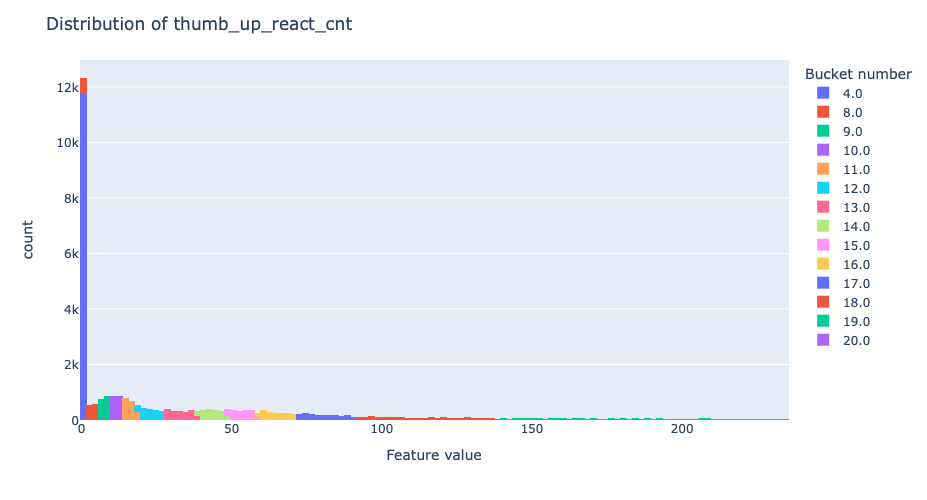

In [38]:
pl.woe_line(X_train['thumb_up_react_cnt'], y_train, n_buckets=20, feature_name='thumb_up_react_cnt', target_name=target, interactive = False)

#### views_div_by_days

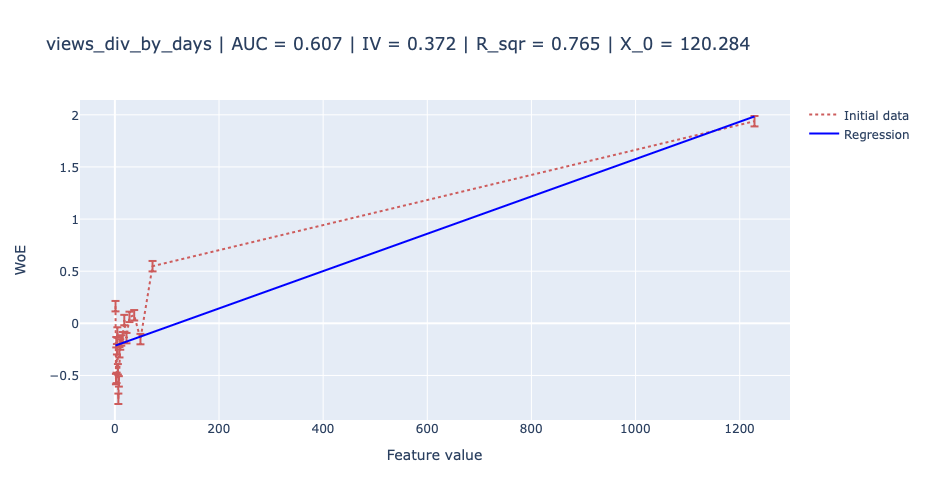

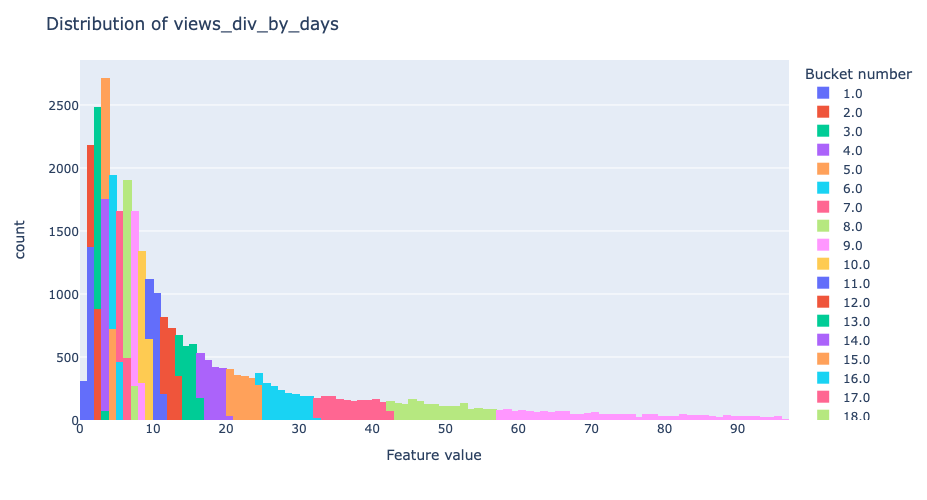

In [39]:
pl.woe_line(X_train['views_div_by_days'], y_train, n_buckets=20, feature_name='views_div_by_days', target_name=target, interactive = False)

#### heart_react_cnt_div_by_days

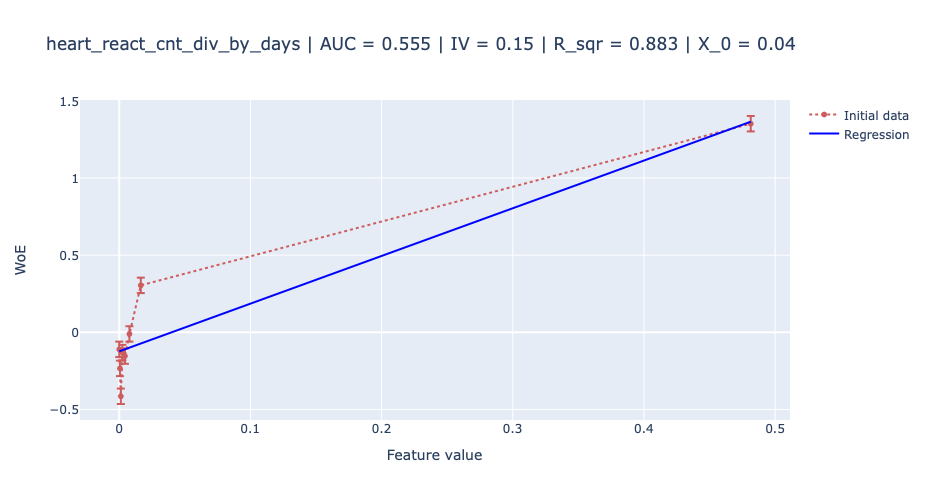

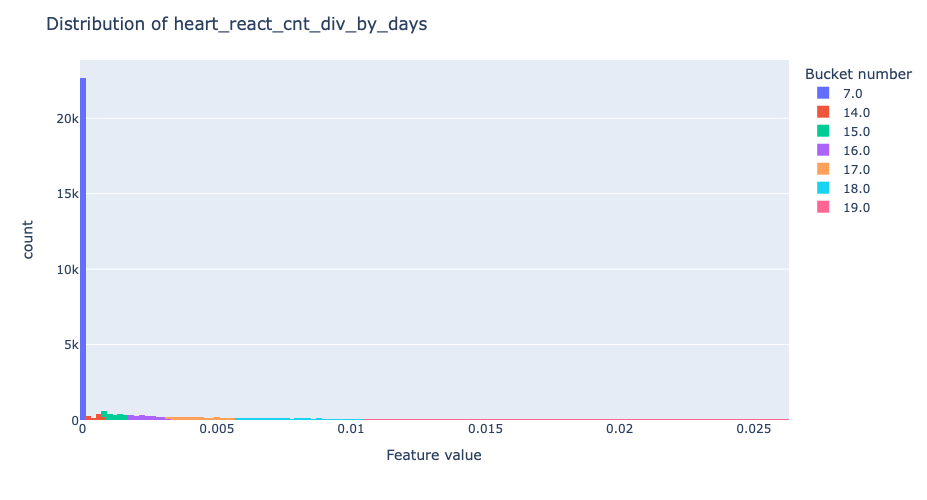

In [40]:
pl.woe_line(X_train['heart_react_cnt_div_by_days'], y_train, n_buckets=20, feature_name='heart_react_cnt_div_by_days', target_name=target, interactive = False)